In [2]:
import xarray as xr
import urllib.request

# importing the FTP URL
url = "ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis2.dailyavgs/gaussian_grid/uwnd.10m.gauss.2020.nc"

local_filename = "uwnd.10m.gauss.2020.nc"
ds = xr.open_dataset(local_filename)
#urllib.request.urlretrieve(url, local_filename)

print(f"File shown as {ds}")

File shown as <xarray.Dataset>
Dimensions:    (level: 1, lat: 94, lon: 192, time: 366, nbnds: 2)
Coordinates:
  * level      (level) float32 10.0
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    uwnd       (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          mean Daily NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    sour

In [3]:
winter = ds.sel(time=ds.time.dt.month.isin([1, 2, 12])).mean(dim="time")
spring = ds.sel(time=ds.time.dt.month.isin([3, 4, 5])).mean(dim="time")
summer = ds.sel(time=ds.time.dt.month.isin([6, 7, 8])).mean(dim="time")
fall = ds.sel(time=ds.time.dt.month.isin([9, 10, 11])).mean(dim="time")

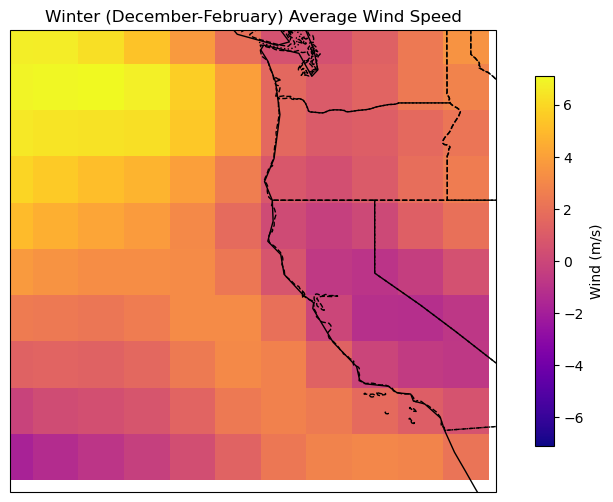

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import urllib.request

variable = ds['uwnd']

# Subset and plot for Winter (Jan-Mar)
winter = variable.sel(time=variable.time.dt.month.isin([1, 2, 3])).mean(dim="time")
west_coast_winter = winter.sel(lat=slice(49, 30), lon=slice(225, 245))

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
west_coast_winter.plot(
    ax=ax, 
    transform=ccrs.PlateCarree(), 
    cmap='plasma', 
    cbar_kwargs={'label': 'Wind (m/s)', 'shrink': 0.8}
)
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='--')
ax.set_extent([-135, -115, 30, 49], crs=ccrs.PlateCarree())
plt.title("Winter (December-February) Average Wind Speed")
plt.show()

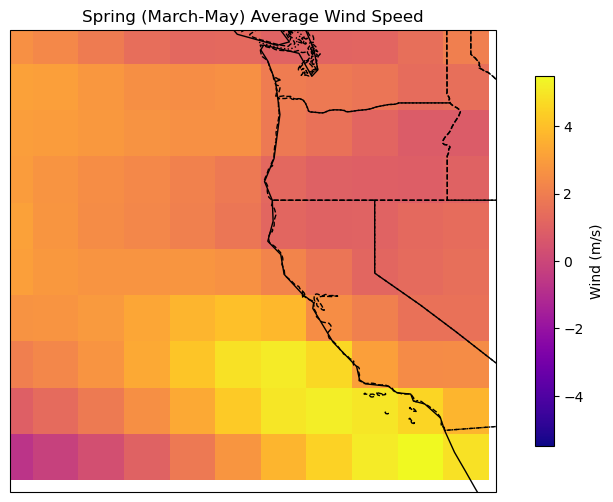

In [5]:
spring = variable.sel(time=variable.time.dt.month.isin([4, 5, 6])).mean(dim="time")
west_coast_spring = spring.sel(lat=slice(49, 30), lon=slice(225, 245))

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
west_coast_spring.plot(
    ax=ax, 
    transform=ccrs.PlateCarree(), 
    cmap='plasma', 
    cbar_kwargs={'label': 'Wind (m/s)', 'shrink': 0.8}
)
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='--')
ax.set_extent([-135, -115, 30, 49], crs=ccrs.PlateCarree())
plt.title("Spring (March-May) Average Wind Speed")
plt.show()

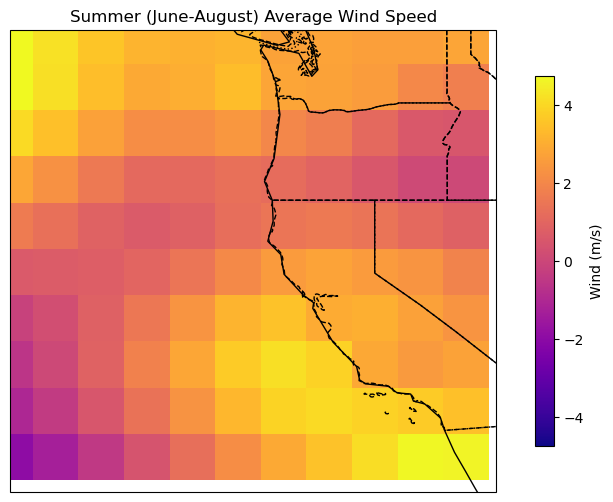

In [6]:
summer = variable.sel(time=variable.time.dt.month.isin([7, 8])).mean(dim="time")
west_coast_summer = summer.sel(lat=slice(49, 30), lon=slice(225, 245))

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
west_coast_summer.plot(
    ax=ax, 
    transform=ccrs.PlateCarree(), 
    cmap='plasma', 
    cbar_kwargs={'label': 'Wind (m/s)', 'shrink': 0.8}
)
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='--')
ax.set_extent([-135, -115, 30, 49], crs=ccrs.PlateCarree())
plt.title("Summer (June-August) Average Wind Speed")
plt.show()

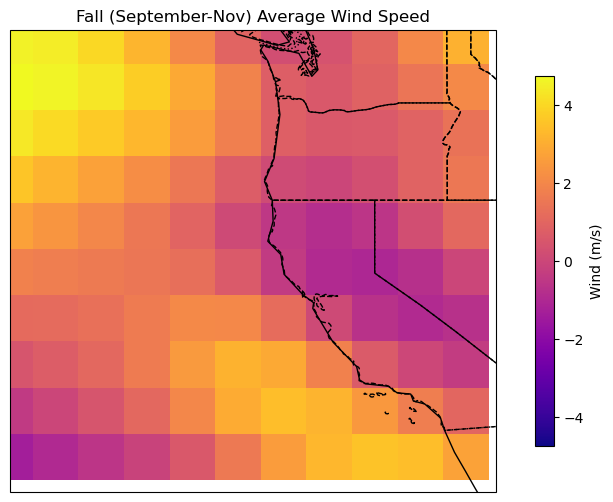

In [7]:
fall = variable.sel(time=variable.time.dt.month.isin([9, 10, 11])).mean(dim="time")
west_coast_fall = fall.sel(lat=slice(49, 30), lon=slice(225, 245))

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
west_coast_fall.plot(
    ax=ax, 
    transform=ccrs.PlateCarree(), 
    cmap='plasma', 
    cbar_kwargs={'label': 'Wind (m/s)', 'shrink': 0.8}
)
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='--')
ax.set_extent([-135, -115, 30, 49], crs=ccrs.PlateCarree())
plt.title("Fall (September-Nov) Average Wind Speed")
plt.show()